In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json, ast
import re

sns.set()
%matplotlib inline

In [3]:
df_data = pd.read_csv("../datasets/acs2017_census_tract_data.csv")
df_data = df_data.dropna(how = "all")

In [4]:
df_data = df_data[["State", "County", "TotalPop", "Men", "Women", "Hispanic", "White", "Black", "Native", "Asian", "Pacific", "Drive", "Carpool", "Transit", "Walk", "OtherTransp", "WorkAtHome", "MeanCommute"]]
df_data.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute
0,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,94.2,3.3,0.0,0.5,0.0,2.1,24.5
1,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,90.5,9.1,0.0,0.0,0.5,0.0,22.2
2,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,88.3,8.4,0.0,1.0,0.8,1.5,23.1
3,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,82.3,11.2,0.0,1.5,2.9,2.1,25.9
4,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,86.9,11.2,0.0,0.8,0.3,0.7,21.0


## Top 20 Counties with Most Total Population
* bar plot
* x-axis = TotalPop
* y-axis = County

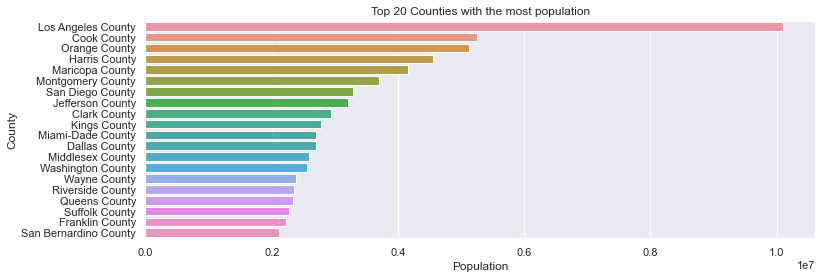

In [5]:
# top 20 county with most TotalPop
plot_data = df_data[["County", "TotalPop"]]\
            .groupby(["County"], as_index = False)\
            .agg("sum")\
            .sort_values(by = "TotalPop", ascending = False)\
            .head(20)

plt.figure(figsize=(12,4))
sns.barplot(data = plot_data, y = "County", x = "TotalPop", orient = 'h').set(
    xlabel = "Population",
    ylabel = "County",
    title = "Top 20 Counties with the most population"
)
plt.show()

## Top 10 States with Most Total Population
* bar plot
* x-axis = TotalPop
* y-axis = State


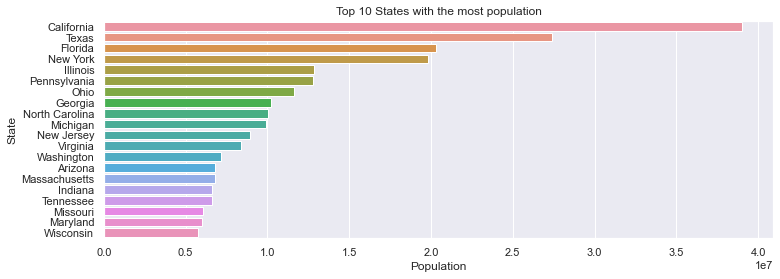

In [6]:
# top 10 states with most TotalPop
plot_data = df_data[["State", "TotalPop"]]\
            .groupby(["State"], as_index = False)\
            .agg("sum")\
            .sort_values(by = "TotalPop", ascending = False)\
            .head(20)

plt.figure(figsize=(12,4))
sns.barplot(data = plot_data, y = "State", x = "TotalPop", orient = 'h').set(
    xlabel = "Population",
    ylabel = "State",
    title = "Top 10 States with the most population"
)
plt.show()

## Total population per state, broken down by gender
* Stacked bar plot
* x-axis = TotalPop
* y-axis = State
* Legends that show the gender-color mapping

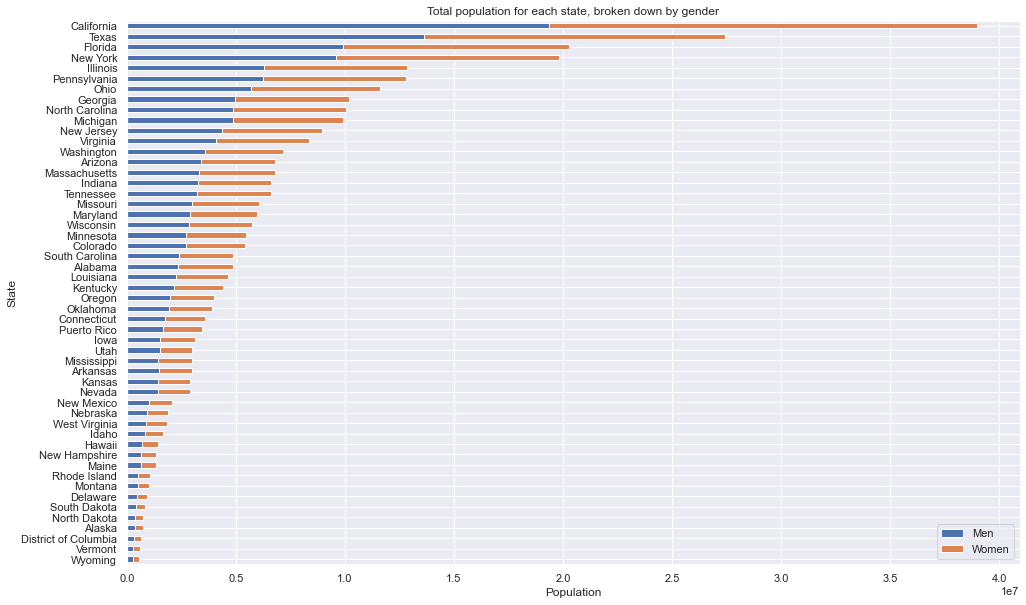

In [8]:
# Total population per state, broken down by gender
plot_data = df_data[["State", "TotalPop", "Men", "Women"]]\
            .groupby(["State"], as_index = False)\
            .agg("sum")\
            .sort_values(by = "TotalPop")[["State", "Men", "Women"]]\
            .set_index("State")

plot_data.plot(kind = "barh", stacked = True, rot = 0, figsize = (16, 10)).set(
    xlabel = "Population",
    ylabel = "State",
    title = "Total population for each state, broken down by gender"
);


## Total population per state, broken down by ethnicity
* Stacked bar plot
* x-axis = TotalPop
* y-axis = State
* Legends that show the ethnicity-color mapping

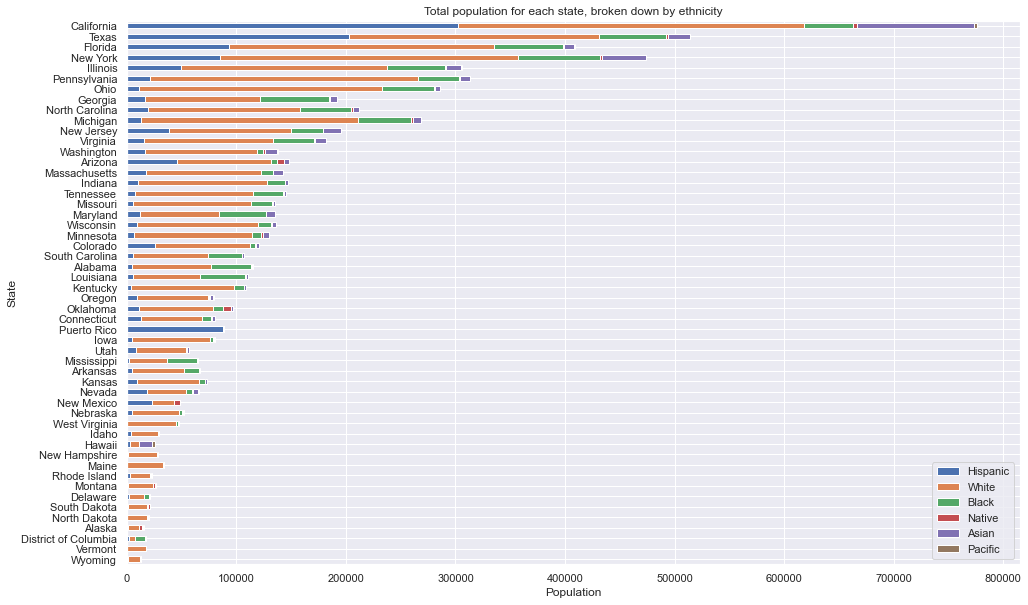

In [9]:
plot_data = df_data[["State", "TotalPop", "Hispanic", "White", "Black", "Native", "Asian", "Pacific"]]\
            .groupby(["State"], as_index = False)\
            .agg("sum")\
            .sort_values(by = "TotalPop")[["State", "Hispanic", "White", "Black", "Native", "Asian", "Pacific"]]\
            .set_index("State")

plot_data.plot(kind = "barh", stacked = True, rot = 0, figsize = (16, 10)).set(
    xlabel = "Population",
    ylabel = "State",
    title = "Total population for each state, broken down by ethnicity"
);

## Top 10 counties with the most mean commute time
* horizontal bar plot
* x-axis = mean commute time in minutes
* y-axis = county

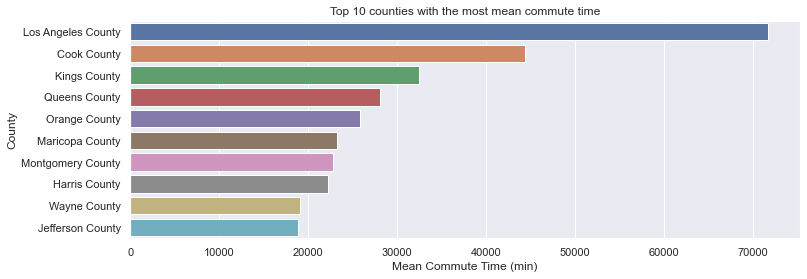

In [10]:
plot_data = df_data[["County", "MeanCommute"]]\
            .groupby(["County"], as_index = False)\
            .agg("sum")\
            .sort_values(by = "MeanCommute", ascending = False)\
            .head(10)

plt.figure(figsize=(12,4))
sns.barplot(data = plot_data, y = "County", x = "MeanCommute", orient = 'h').set(
    xlabel = "Mean Commute Time (min)",
    ylabel = "County",
    title = "Top 10 counties with the most mean commute time"
)
plt.show()


For the top 10 counties, we are interested in how residents commute.

## Commute method distribution for top 10 counties with the most commute time
* stacked bar plot
* x-axis = county
* y-axis = percentage
* legends that show the commute method-color mapping

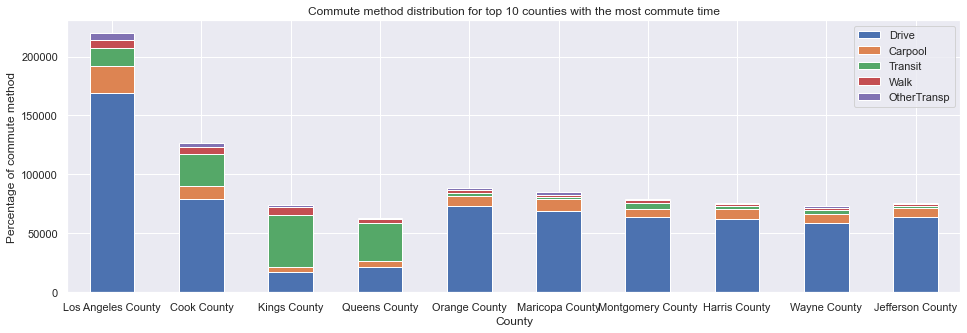

In [11]:
plot_data = df_data[["County", "MeanCommute", "Drive", "Carpool", "Transit", "Walk", "OtherTransp"]]\
            .groupby(["County"], as_index = False)\
            .agg("sum")\
            .sort_values(by = "MeanCommute", ascending = False)[["County", "Drive", "Carpool", "Transit", "Walk", "OtherTransp"]]\
            .set_index("County")\
            .head(10)

plot_data.plot(kind = "bar", stacked = True, rot = 0, figsize = (16, 5)).set(
    xlabel = "County",
    ylabel = "Percentage of commute method",
    title = "Commute method distribution for top 10 counties with the most commute time"
);


Interestingly, in most of the top 10 counties, the majority of residents choose to drive, while in Kings County and Queens County, a decent amount of residents choose public transportation.